# Análise Descritiva

Análise de correlação e gráfico de dispersão das variáveis quantitativas e gráficos de proporção das variáveis qualitativas.

###### Importando as bibliotecas 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Cenário 1

In [2]:
data1 = pd.read_csv('Cenario1_200000.csv')
data1.head()

,sexo,nivel_escolaridade,faixa_etaria,estado_civil,idade,classe_economica_familiar,renda,despesa_saude,responsavel_renda_familiar,trabalho,...,ativo,cartao,valor_fatura,fatura_atraso,nome_negativado,porc_paga_fatura,cpf_ativo,score_fraude_maior_ponto_corte,foto_semelhante_documento,fraude
0,Feminino,Ensino superior completo,Adulto (de 20 à 59 anos),Solteiro(a),49,Classe média,3.58,0.04,1,Trabalha regularmente,...,1,1,0.21,0,0,1.0,1,0,1,0
1,Feminino,Ensino médio completo e superior incompleto,Adulto (de 20 à 59 anos),Casado(a),56,Classe baixa,1.33,0.23,1,Trabalha regularmente,...,0,1,0.32,0,1,1.0,1,0,1,0
2,Masculino,Ensino fundamental completo e médio incompleto,Adulto (de 20 à 59 anos),Casado(a),51,Classe média,4.29,0.08,1,Trabalha regularmente,...,1,0,0.00,0,0,1.0,1,0,1,0
3,Feminino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Viúvo(a),73,Classe baixa,1.42,0.04,1,Trabalha regularmente,...,0,1,0.45,0,0,1.0,1,0,1,0
4,Masculino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Casado(a),75,Classe baixa,1.82,0.13,1,Trabalha regularmente,...,0,1,0.30,0,0,1.0,1,0,1,0


In [3]:
data1['responsavel_renda_familiar'] = data1['responsavel_renda_familiar'].astype('object')
data1['conta'] = data1['conta'].astype('object')
data1['ativo'] = data1['ativo'].astype('object')
data1['cartao'] = data1['cartao'].astype('object')
data1['fatura_atraso'] = data1['fatura_atraso'].astype('object')
data1['nome_negativado'] = data1['nome_negativado'].astype('object')
data1['cpf_ativo'] = data1['cpf_ativo'].astype('object')
data1['score_fraude_maior_ponto_corte'] = data1['score_fraude_maior_ponto_corte'].astype('object')
data1['foto_semelhante_documento'] = data1['foto_semelhante_documento'].astype('object')
data1['fraude'] = data1['fraude'].astype('category')

In [4]:
data1 = data1.rename(columns={"porc_paga_fatura ": "porc_paga_fatura"})

###### Transformando as variáveis 

In [5]:
# Tranformando a renda em reais e não em quantidade de salários 
data1['renda'] = data1['renda']*1100
# A variavel despesa_saude foi criada pra ser a proporção de gastos com saude em relação a renda
data1['despesa_saude'] = data1['despesa_saude'] * data1['renda']
# A variável valor da fatura do cartão foi criada para ser a porcentagem em relação ao salário da pessoa
data1['valor_fatura'] = data1['valor_fatura'] * data1['renda']
# A variável porcentagem paga da fatura é o quanto foi pago da fatura
data1['porc_paga_fatura'] = data1['valor_fatura'] * data1['porc_paga_fatura']

In [6]:
data1.head()

,sexo,nivel_escolaridade,faixa_etaria,estado_civil,idade,classe_economica_familiar,renda,despesa_saude,responsavel_renda_familiar,trabalho,...,ativo,cartao,valor_fatura,fatura_atraso,nome_negativado,porc_paga_fatura,cpf_ativo,score_fraude_maior_ponto_corte,foto_semelhante_documento,fraude
0,Feminino,Ensino superior completo,Adulto (de 20 à 59 anos),Solteiro(a),49,Classe média,3938.0,157.52,1,Trabalha regularmente,...,1,1,826.98,0,0,826.98,1,0,1,0
1,Feminino,Ensino médio completo e superior incompleto,Adulto (de 20 à 59 anos),Casado(a),56,Classe baixa,1463.0,336.49,1,Trabalha regularmente,...,0,1,468.16,0,1,468.16,1,0,1,0
2,Masculino,Ensino fundamental completo e médio incompleto,Adulto (de 20 à 59 anos),Casado(a),51,Classe média,4719.0,377.52,1,Trabalha regularmente,...,1,0,0.00,0,0,0.00,1,0,1,0
3,Feminino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Viúvo(a),73,Classe baixa,1562.0,62.48,1,Trabalha regularmente,...,0,1,702.90,0,0,702.90,1,0,1,0
4,Masculino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Casado(a),75,Classe baixa,2002.0,260.26,1,Trabalha regularmente,...,0,1,600.60,0,0,600.60,1,0,1,0


In [7]:
data1.dtypes

sexo                                object
nivel_escolaridade                  object
faixa_etaria                        object
estado_civil                        object
idade                                int64
classe_economica_familiar           object
renda                              float64
despesa_saude                      float64
responsavel_renda_familiar          object
trabalho                            object
tempo_trabalho                      object
casa                                object
regiao                              object
conta                               object
ativo                               object
cartao                              object
valor_fatura                       float64
fatura_atraso                       object
nome_negativado                     object
porc_paga_fatura                   float64
cpf_ativo                           object
score_fraude_maior_ponto_corte      object
foto_semelhante_documento           object
fraude     

### Análise de correlação

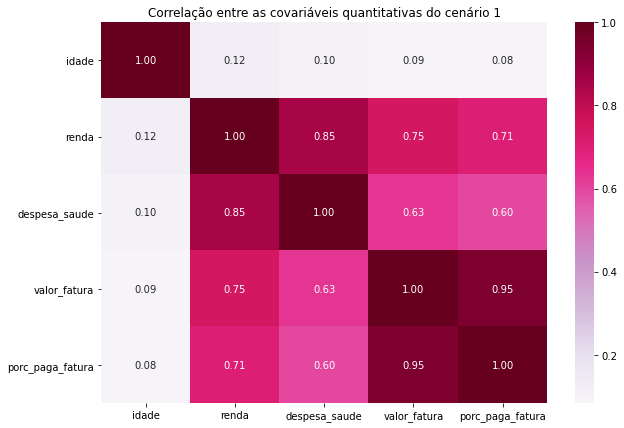

In [8]:
plt.figure(figsize=(10, 7))
sns.heatmap(data1.corr(),
            annot = True,
            fmt = '.2f',
            cmap='PuRd')
plt.title('Correlação entre as covariáveis quantitativas do cenário 1')
plt.show()

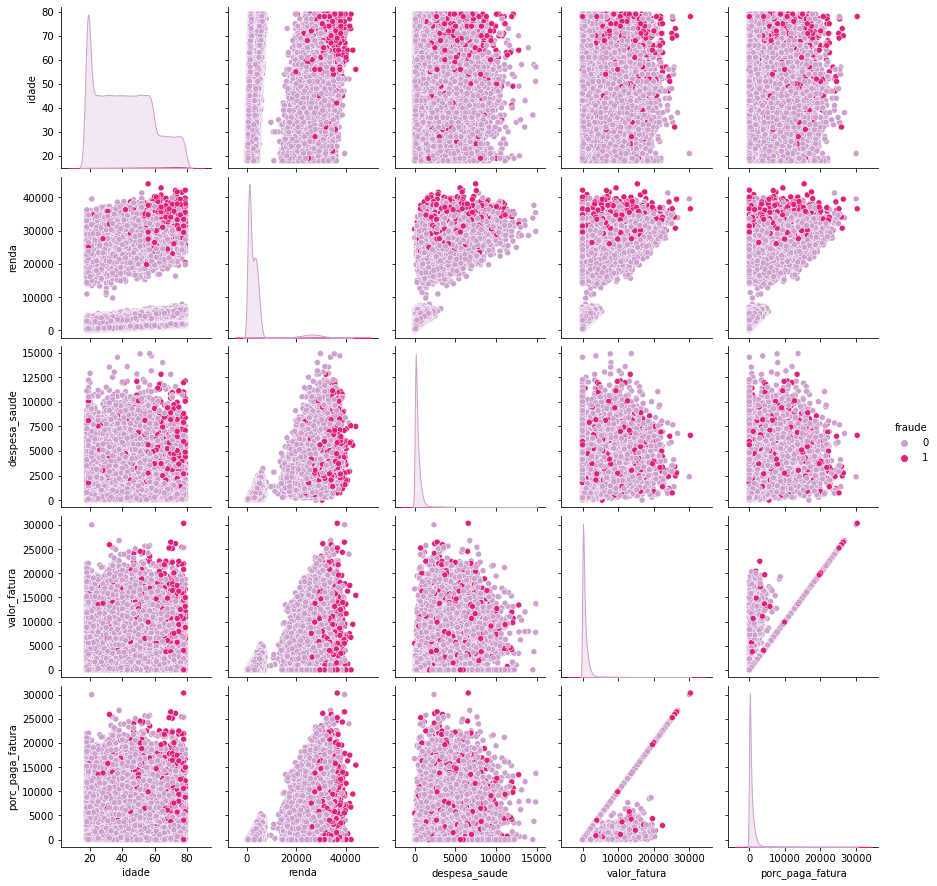

In [38]:
#sns.set_theme(style="ticks")

sns.pairplot(data1[['idade','renda','despesa_saude','valor_fatura','porc_paga_fatura','fraude']], hue="fraude", palette = "PuRd")

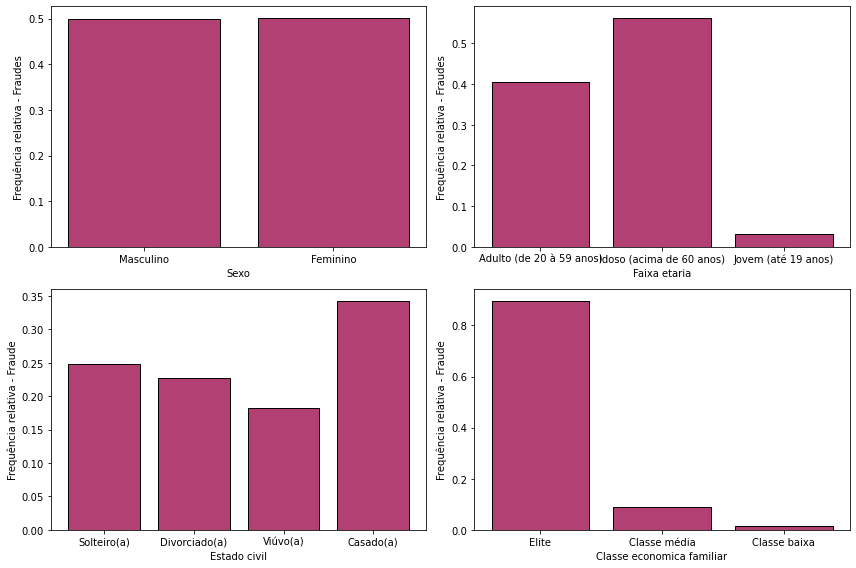

In [17]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
g =sns.histplot(data1.loc[data1["fraude"]==1], x="sexo", stat="probability", multiple="dodge",color = "#980043", shrink=.8, ax=ax1)
g.set(xlabel='Sexo', ylabel='Frequência relativa - Fraudes')

ax3 = fig.add_subplot(222)
g = sns.histplot(data1.loc[data1["fraude"]==1], x="faixa_etaria",color = "#980043", stat="probability", multiple="dodge", shrink=.8, ax=ax3)
g.set(xlabel='Faixa etaria', ylabel='Frequência relativa - Fraudes')
#sns.countplot(x="faixa_etaria", hue="fraude", data=data1, palette = "PuRd", ax=ax3)

ax4 = fig.add_subplot(223)
g =sns.histplot(data1.loc[data1["fraude"]==1], x="estado_civil", stat="probability", multiple="dodge",color = "#980043", shrink=.8, ax=ax4)
g.set(xlabel='Estado civil', ylabel='Frequência relativa - Fraude')

ax5 = fig.add_subplot(224)
g = sns.histplot(data1.loc[data1["fraude"]==1], x="classe_economica_familiar", stat="probability", multiple="dodge",color = "#980043", shrink=.8, ax=ax5)
g.set(xlabel='Classe economica familiar', ylabel='Frequência relativa - Fraude')
#sns.countplot(x="classe_economica_familiar", hue="fraude", data=data1, palette = "PuRd",ax=ax2)

plt.close(2)
plt.close(3)
plt.tight_layout()

In [64]:
#frequencia das variáveis 
a = data1.groupby(["foto_semelhante_documento"]).foto_semelhante_documento.count()
(a/len(data1))*100

foto_semelhante_documento
0     5.8875
1    94.1125
Name: foto_semelhante_documento, dtype: float64

In [66]:
# frequencia casos de fraude
b = data1.loc[data1.fraude == 1].groupby(["foto_semelhante_documento"]).foto_semelhante_documento.count()
(b/len(data1.loc[data1.fraude == 1]))*100

foto_semelhante_documento
0    50.099141
1    49.900859
Name: foto_semelhante_documento, dtype: float64

[Text(0.5, 0, 'Fraude'),
 Text(0, 0.5, 'Valor pago da última fatura do cartão de crédito')]

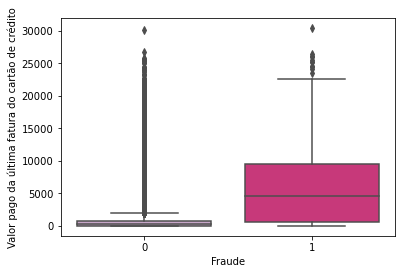

In [59]:
g = sns.boxplot(x="fraude", y="porc_paga_fatura",data=data1, palette="PuRd")
g.set(xlabel='Fraude', ylabel='Valor pago da última fatura do cartão de crédito')

[Text(0.5, 0, 'Nivel de escolaridade'), Text(0, 0.5, 'Frequência relativa')]

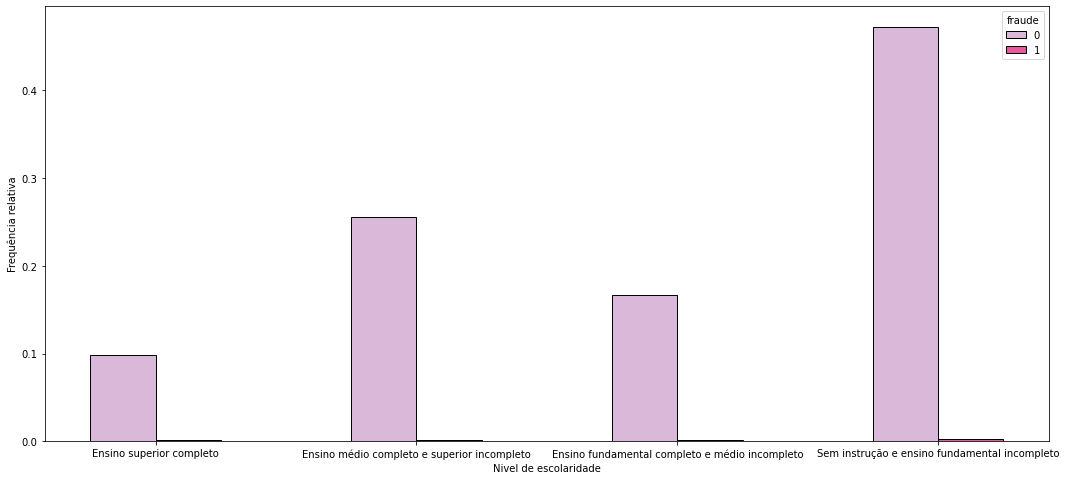

In [25]:
fig = plt.figure(figsize=(18,8))
g = sns.histplot(data1, x="nivel_escolaridade", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.5)
g.set(xlabel='Nivel de escolaridade', ylabel='Frequência relativa')

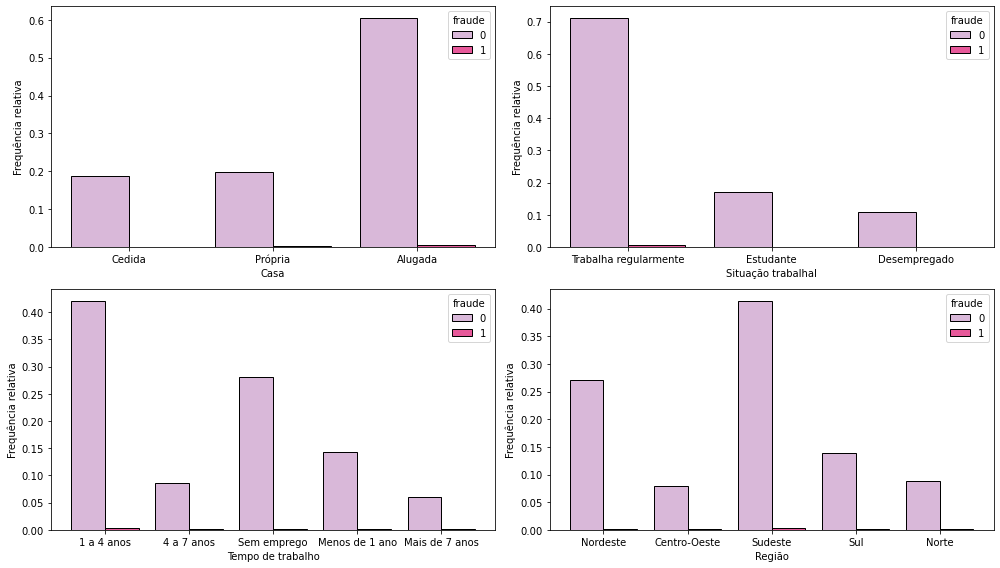

In [24]:
fig = plt.figure(figsize=(14,8))

ax6 = fig.add_subplot(221)
g = sns.histplot(data1, x="casa", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax6)
g.set(xlabel='Casa', ylabel='Frequência relativa')
#sns.countplot(x="faixa_etaria", hue="fraude", data=data1, palette = "PuRd", ax=ax3)

ax7 = fig.add_subplot(222)
g =sns.histplot(data1, x="trabalho", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax7)
g.set(xlabel='Situação trabalhal', ylabel='Frequência relativa')

ax8 = fig.add_subplot(223)
g = sns.histplot(data1, x="tempo_trabalho", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax8)
g.set(xlabel='Tempo de trabalho', ylabel='Frequência relativa')
#sns.countplot(x="classe_economica_familiar", hue="fraude", data=data1, palette = "PuRd",ax=ax2)

ax9 = fig.add_subplot(224)
g = sns.histplot(data1, x="regiao", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax9)
g.set(xlabel='Região', ylabel='Frequência relativa')

plt.close(2)
plt.close(3)
plt.tight_layout()

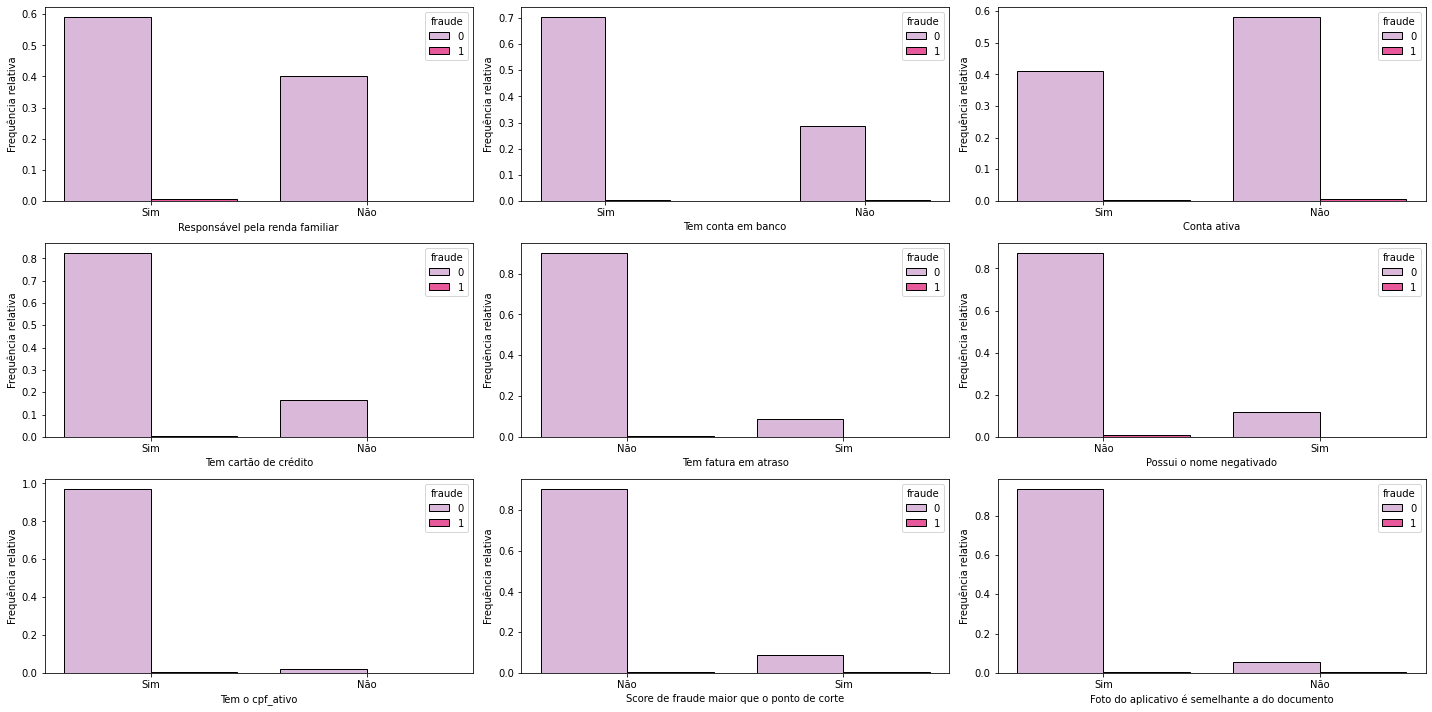

In [103]:
import numpy as np
var = ["responsavel_renda_familiar", "conta", "ativo","cartao","fatura_atraso", "nome_negativado","cpf_ativo",
       "score_fraude_maior_ponto_corte","foto_semelhante_documento"]
for i in var:
    data1[i] = np.where(data1[i] == 1, "Sim", 'Não')

fig = plt.figure(figsize=(18,15))

ax1 = fig.add_subplot(331)
g =sns.histplot(data1, x="responsavel_renda_familiar", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax1)
g.set(xlabel='Responsável pela renda familiar', ylabel='Frequência relativa')

ax2 = fig.add_subplot(332)
g = sns.histplot(data1, x="conta", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.5, ax=ax2)
g.set(xlabel='Tem conta em banco', ylabel='Frequência relativa')
#sns.countplot(x="classe_economica_familiar", hue="fraude", data=data1, palette = "PuRd",ax=ax2)

ax3 = fig.add_subplot(333)
g = sns.histplot(data1, x="ativo", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax3)
g.set(xlabel='Conta ativa', ylabel='Frequência relativa')
#sns.countplot(x="faixa_etaria", hue="fraude", data=data1, palette = "PuRd", ax=ax3)

ax4 = fig.add_subplot(334)
g =sns.histplot(data1, x="cartao", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax4)
g.set(xlabel='Tem cartão de crédito', ylabel='Frequência relativa')

ax5 = fig.add_subplot(335)
g = sns.histplot(data1, x="fatura_atraso", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax5)
g.set(xlabel='Tem fatura em atraso', ylabel='Frequência relativa')
#sns.countplot(x="classe_economica_familiar", hue="fraude", data=data1, palette = "PuRd",ax=ax2)

ax6 = fig.add_subplot(336)
g = sns.histplot(data1, x="nome_negativado", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax6)
g.set(xlabel='Possui o nome negativado', ylabel='Frequência relativa')
#sns.countplot(x="faixa_etaria", hue="fraude", data=data1, palette = "PuRd", ax=ax3)

ax7 = fig.add_subplot(337)
g =sns.histplot(data1, x="cpf_ativo", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax7)
g.set(xlabel='Tem o cpf_ativo', ylabel='Frequência relativa')

ax8 = fig.add_subplot(338)
g = sns.histplot(data1, x="score_fraude_maior_ponto_corte", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax8)
g.set(xlabel='Score de fraude maior que o ponto de corte', ylabel='Frequência relativa')
#sns.countplot(x="classe_economica_familiar", hue="fraude", data=data1, palette = "PuRd",ax=ax2)

ax9 = fig.add_subplot(339)
g = sns.histplot(data1, x="foto_semelhante_documento", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax9)
g.set(xlabel='Foto do aplicativo é semelhante a do documento', ylabel='Frequência relativa')

plt.close(2)
plt.close(3)
plt.tight_layout()

In [83]:
#fig = sns.catplot(x="sexo", kind="count", hue="fraude", data=data1, palette = "PuRd")
#fig.set_ylabels('Freuencia absoluta', fontsize=12)
#fig.set_xlabels('Sexo', fontsize=12)

In [75]:
#sns.catplot(x="nivel_escolaridade", kind="count", hue="fraude", data=data1, palette = "PuRd", height=10, aspect=15/10)

## Cenário 2

In [3]:
data2 = pd.read_csv('Cenario2_200000.csv')
data2.head()

,saldo_conta,idade,score_credito,limite_credito,renda,valor_compra,qnt_parcelas,valor_parcela,percent_compra,tempo_contratacao,valor_ult_fatura,qnt_compra_ult_fatura,media_compra_ult_fatura,iu_ult_fatura,iu_penultima_fatura,qnt_compra_virtual_ult_fatura,qnt_compra_fisica_ult_fatura,max_compra_virtual_ult_mes,dif_endereços_km,fraude
0,4127.28,42.0,640.0,1592.0,1576.90,334.32,6,55.72,0.21,30,764.16,11,69.47,0.48,0.28,4.0,7.0,145.19,0.055126,0
1,3058.12,50.0,720.0,9616.0,4540.60,2307.84,3,769.28,0.24,20,2500.16,15,166.68,0.26,0.61,5.0,10.0,200.01,0.095668,0
2,18540.01,53.0,100.0,10630.0,8507.03,2444.90,4,611.22,0.23,40,4358.30,11,396.21,0.41,0.76,0.0,11.0,0.00,0.322908,0
3,0.00,43.0,460.0,5138.0,2046.03,616.56,22,28.03,0.12,30,2671.76,11,242.89,0.52,0.60,1.0,10.0,480.92,0.000000,0
4,3117.92,45.0,290.0,1087.0,1142.75,206.53,10,20.65,0.19,30,739.16,13,56.86,0.68,0.47,2.0,11.0,635.68,0.653934,0


In [4]:
data2['fraude'] = data2['fraude'].astype('category')

In [5]:
pd.set_option('display.max_columns',30)

In [9]:
data2.describe()

,saldo_conta,idade,score_credito,limite_credito,renda,valor_compra,qnt_parcelas,valor_parcela,percent_compra,tempo_contratacao,valor_ult_fatura,qnt_compra_ult_fatura,media_compra_ult_fatura,iu_ult_fatura,iu_penultima_fatura,qnt_compra_virtual_ult_fatura,qnt_compra_fisica_ult_fatura,max_compra_virtual_ult_mes,dif_endereços_km
count,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,8016.365060,43.009500,500.203450,4162.88207,3499.746796,1186.423235,9.972075,199.918545,0.285097,39.963500,1854.718766,10.777905,186.035293,0.445885,0.411020,2.743825,8.034080,650.97650,15.907225
std,9840.001777,5.510103,204.232288,3033.94184,2570.460547,1192.232507,6.796322,396.617293,0.159809,19.973524,1703.015934,3.462196,194.080210,0.202487,0.199517,2.282642,3.320811,805.95639,94.725524
min,0.000000,18.000000,0.000000,200.00000,70.830000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,649.850000,39.000000,350.000000,1747.00000,1644.622500,346.080000,4.000000,44.740000,0.160000,30.000000,602.240000,9.000000,55.420000,0.300000,0.260000,1.000000,6.000000,108.77750,0.134031
50%,4707.980000,43.000000,500.000000,3481.00000,2939.015000,802.800000,9.000000,86.670000,0.260000,40.000000,1353.000000,11.000000,127.100000,0.440000,0.400000,2.000000,8.000000,373.81000,0.575305
75%,11601.397500,47.000000,650.000000,5920.00000,4701.532500,1627.925000,15.000000,191.582500,0.390000,50.000000,2596.000000,13.000000,250.470000,0.590000,0.550000,4.000000,10.000000,889.53750,1.384781
max,116634.360000,66.000000,1000.000000,18562.00000,28873.360000,13042.620000,24.000000,12349.600000,0.920000,160.000000,15247.300000,31.000000,4793.720000,0.990000,0.990000,19.000000,27.000000,9299.82000,3329.261163


In [7]:
data2.loc[data2.fraude == 1].describe()

,saldo_conta,idade,score_credito,limite_credito,renda,valor_compra,qnt_parcelas,valor_parcela,percent_compra,tempo_contratacao,valor_ult_fatura,qnt_compra_ult_fatura,media_compra_ult_fatura,iu_ult_fatura,iu_penultima_fatura,qnt_compra_virtual_ult_fatura,qnt_compra_fisica_ult_fatura,max_compra_virtual_ult_mes,dif_endereços_km
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000
mean,12037.766164,43.109952,566.019262,3985.922151,4353.885136,1136.284278,8.434189,243.974262,0.284976,42.078652,1704.818018,11.225522,161.723949,0.436661,0.417175,2.691011,8.534510,612.142030,901.388421
std,12067.692580,5.655856,201.423161,3021.271604,3055.079544,1164.264247,6.410214,427.368450,0.165529,20.595868,1602.924593,3.328064,163.202110,0.195044,0.194892,2.290550,3.396669,811.462688,350.079502
min,4.650000,28.000000,40.000000,200.000000,109.790000,11.860000,1.000000,5.030000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.702186
25%,3581.800000,39.000000,420.000000,1664.500000,2165.752500,316.230000,3.000000,47.170000,0.150000,30.000000,577.650000,9.000000,51.445000,0.290000,0.270000,1.000000,6.000000,105.635000,666.581559
50%,8264.630000,43.000000,580.000000,3212.500000,3631.295000,755.390000,7.000000,98.470000,0.260000,40.000000,1219.720000,11.000000,110.115000,0.430000,0.410000,2.000000,8.000000,338.310000,823.451865
75%,16474.165000,47.000000,720.000000,5562.000000,5790.572500,1565.345000,12.000000,233.260000,0.390000,50.000000,2340.002500,13.000000,213.865000,0.570000,0.560000,4.000000,11.000000,775.530000,1055.099868
max,109007.950000,62.000000,970.000000,15762.000000,25680.260000,9426.480000,24.000000,4628.500000,0.840000,120.000000,11665.500000,23.000000,1468.610000,0.960000,0.940000,13.000000,20.000000,6510.820000,3329.261163


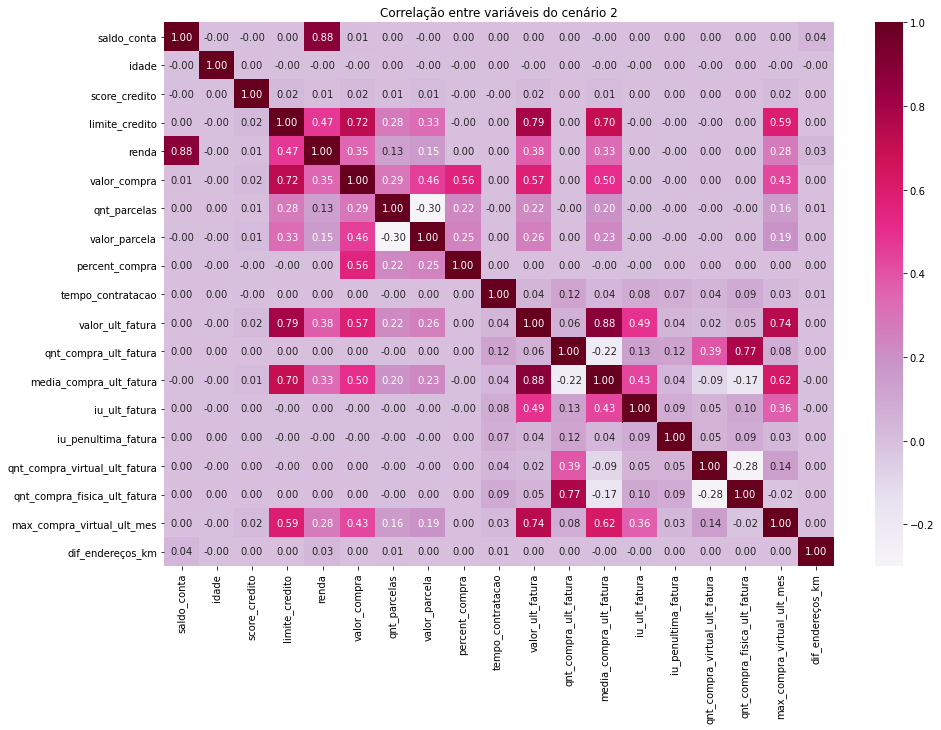

In [94]:
plt.figure(figsize=(15, 10))
sns.heatmap(data2.corr(),
            annot = True,
            fmt = '.2f',
            cmap='PuRd')
plt.title('Correlação entre variáveis do cenário 2')
plt.show()

In [106]:
data2.columns

Index(['saldo_conta', 'idade', 'score_credito', 'limite_credito', 'renda',
       'valor_compra', 'qnt_parcelas', 'valor_parcela', 'percent_compra',
       'tempo_contratacao', 'valor_ult_fatura', 'qnt_compra_ult_fatura',
       'media_compra_ult_fatura', 'iu_ult_fatura', 'iu_penultima_fatura',
       'qnt_compra_virtual_ult_fatura', 'qnt_compra_fisica_ult_fatura',
       'max_compra_virtual_ult_mes', 'dif_endereços_km', 'fraude'],
      dtype='object')

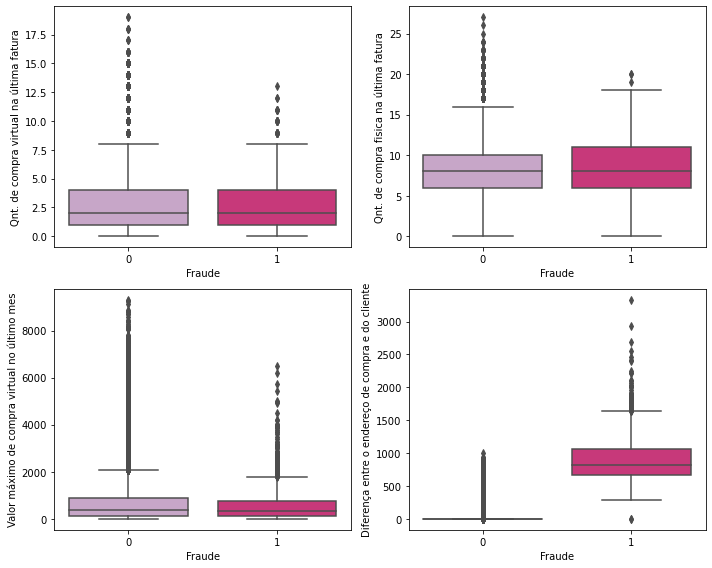

In [75]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
g = sns.boxplot(x="fraude", y="qnt_compra_virtual_ult_fatura",data=data2, palette="PuRd", ax=ax1)
g.set(xlabel='Fraude', ylabel='Qnt. de compra virtual na última fatura')

ax2 = fig.add_subplot(222)
g = sns.boxplot(x="fraude", y="qnt_compra_fisica_ult_fatura",data=data2, palette="PuRd", ax=ax2)
g.set(xlabel='Fraude', ylabel='Qnt. de compra fisica na última fatura')

ax3 = fig.add_subplot(223)
g = sns.boxplot(x="fraude", y="max_compra_virtual_ult_mes",data=data2, palette="PuRd", ax=ax3)
g.set(xlabel='Fraude', ylabel='Valor máximo de compra virtual no último mes')

ax4 = fig.add_subplot(224)
g = sns.boxplot(x="fraude", y="dif_endereços_km",data=data2, palette="PuRd", ax=ax4)
g.set(xlabel='Fraude', ylabel='Diferença entre o endereço de compra e do cliente')

plt.close(2)
plt.close(3)
plt.tight_layout()

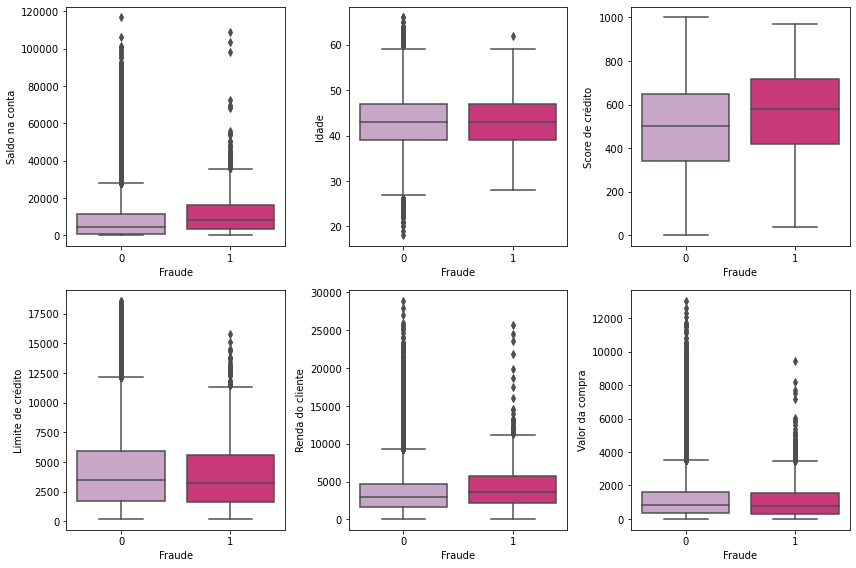

In [68]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(231)
g = sns.boxplot(x="fraude", y="saldo_conta",data=data2, palette="PuRd", ax=ax1)
g.set(xlabel='Fraude', ylabel='Saldo na conta')

ax2 = fig.add_subplot(232)
g = sns.boxplot(x="fraude", y="idade",data=data2, palette="PuRd", ax=ax2)
g.set(xlabel='Fraude', ylabel='Idade')

ax3 = fig.add_subplot(233)
g = sns.boxplot(x="fraude", y="score_credito",data=data2, palette="PuRd", ax=ax3)
g.set(xlabel='Fraude', ylabel='Score de crédito')

ax4 = fig.add_subplot(234)
g = sns.boxplot(x="fraude", y="limite_credito",data=data2, palette="PuRd", ax=ax4)
g.set(xlabel='Fraude', ylabel='Limite de crédito')

ax5 = fig.add_subplot(235)
g = sns.boxplot(x="fraude", y="renda",data=data2, palette="PuRd", ax=ax5)
g.set(xlabel='Fraude', ylabel='Renda do cliente')

ax6 = fig.add_subplot(236)
g = sns.boxplot(x="fraude", y="valor_compra",data=data2, palette="PuRd", ax=ax6)
g.set(xlabel='Fraude', ylabel='Valor da compra')

plt.close(2)
plt.close(3)
plt.tight_layout()

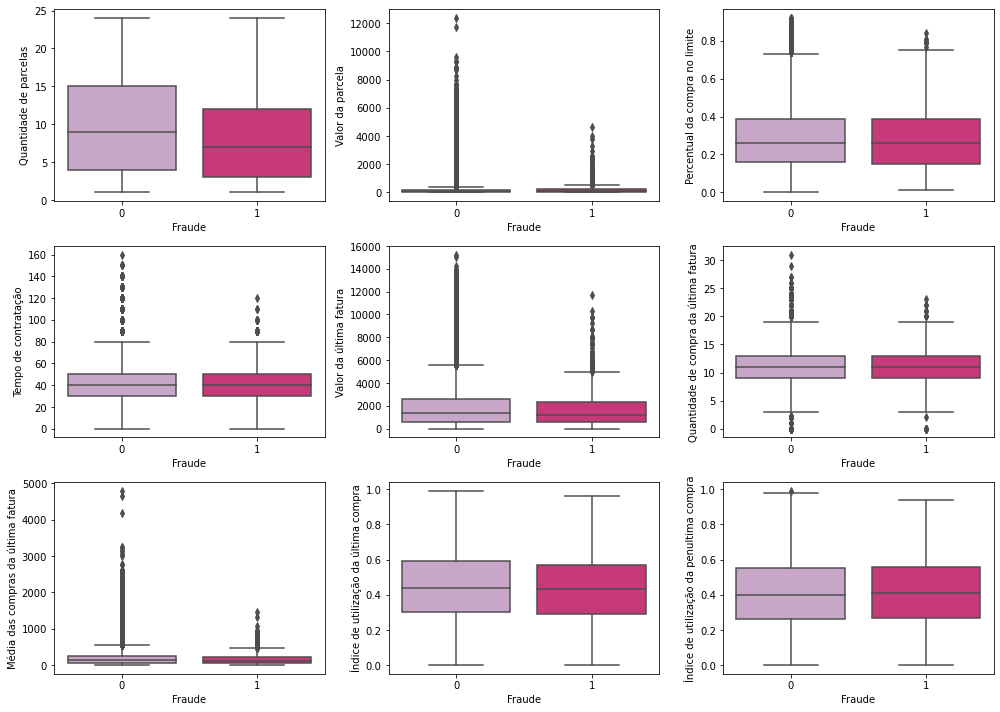

In [76]:
fig = plt.figure(figsize=(14,10))

ax1 = fig.add_subplot(331)
g = sns.boxplot(x="fraude", y="qnt_parcelas",data=data2, palette="PuRd", ax=ax1)
g.set(xlabel='Fraude', ylabel='Quantidade de parcelas')

ax2 = fig.add_subplot(332)
g = sns.boxplot(x="fraude", y="valor_parcela",data=data2, palette="PuRd", ax=ax2)
g.set(xlabel='Fraude', ylabel='Valor da parcela')

ax3 = fig.add_subplot(333)
g = sns.boxplot(x="fraude", y="percent_compra",data=data2, palette="PuRd", ax=ax3)
g.set(xlabel='Fraude', ylabel='Percentual da compra no limite')

ax4 = fig.add_subplot(334)
g = sns.boxplot(x="fraude", y="tempo_contratacao",data=data2, palette="PuRd", ax=ax4)
g.set(xlabel='Fraude', ylabel='Tempo de contratação')

ax5 = fig.add_subplot(335)
g = sns.boxplot(x="fraude", y="valor_ult_fatura",data=data2, palette="PuRd", ax=ax5)
g.set(xlabel='Fraude', ylabel='Valor da última fatura')

ax6 = fig.add_subplot(336)
g = sns.boxplot(x="fraude", y="qnt_compra_ult_fatura",data=data2, palette="PuRd", ax=ax6)
g.set(xlabel='Fraude', ylabel='Quantidade de compra da última fatura')

ax7 = fig.add_subplot(337)
g = sns.boxplot(x="fraude", y="media_compra_ult_fatura",data=data2, palette="PuRd", ax=ax7)
g.set(xlabel='Fraude', ylabel='Média das compras da última fatura')

ax8 = fig.add_subplot(338)
g = sns.boxplot(x="fraude", y="iu_ult_fatura",data=data2, palette="PuRd", ax=ax8)
g.set(xlabel='Fraude', ylabel='Índice de utilização da última compra')

ax9 = fig.add_subplot(339)
g = sns.boxplot(x="fraude", y="iu_penultima_fatura",data=data2, palette="PuRd", ax=ax9)
g.set(xlabel='Fraude', ylabel='Índice de utilização da penultima compra')

plt.close(2)
plt.close(3)
plt.tight_layout()

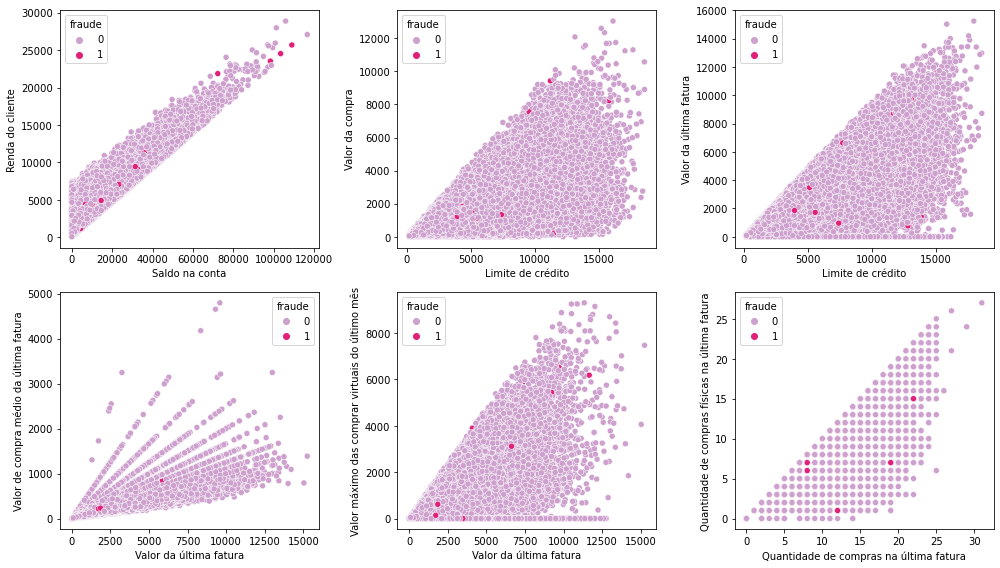

In [42]:
fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(231)
g = sns.scatterplot(data=data2, x="saldo_conta", y="renda", hue="fraude", palette = "PuRd", ax =ax1)
g.set(xlabel='Saldo na conta', ylabel='Renda do cliente')

ax2 = fig.add_subplot(233)
g = sns.scatterplot(data=data2, x="limite_credito", y="valor_ult_fatura", hue="fraude", palette = "PuRd", ax = ax2)
g.set(xlabel='Limite de crédito', ylabel='Valor da última fatura')

ax3 = fig.add_subplot(232)
g = sns.scatterplot(data=data2, x="limite_credito", y="valor_compra", hue="fraude", palette = "PuRd", ax =ax3)
g.set(xlabel='Limite de crédito', ylabel='Valor da compra')

ax4 = fig.add_subplot(234)
g = sns.scatterplot(data=data2, x="valor_ult_fatura", y="media_compra_ult_fatura", hue="fraude", palette = "PuRd", ax = ax4)
g.set(xlabel='Valor da última fatura', ylabel='Valor de compra médio da última fatura')

ax5 = fig.add_subplot(235)
g = sns.scatterplot(data=data2, x="valor_ult_fatura", y="max_compra_virtual_ult_mes", hue="fraude", palette = "PuRd", ax =ax5)
g.set(xlabel='Valor da última fatura', ylabel='Valor máximo das comprar virtuais do último mês')

ax6 = fig.add_subplot(236)
g = sns.scatterplot(data=data2, x="qnt_compra_ult_fatura", y="qnt_compra_fisica_ult_fatura", hue="fraude", palette = "PuRd", ax = ax6)
g.set(xlabel='Quantidade de compras na última fatura', ylabel='Quantidade de compras físicas na última fatura')

plt.close(2)
plt.close(3)
plt.tight_layout()

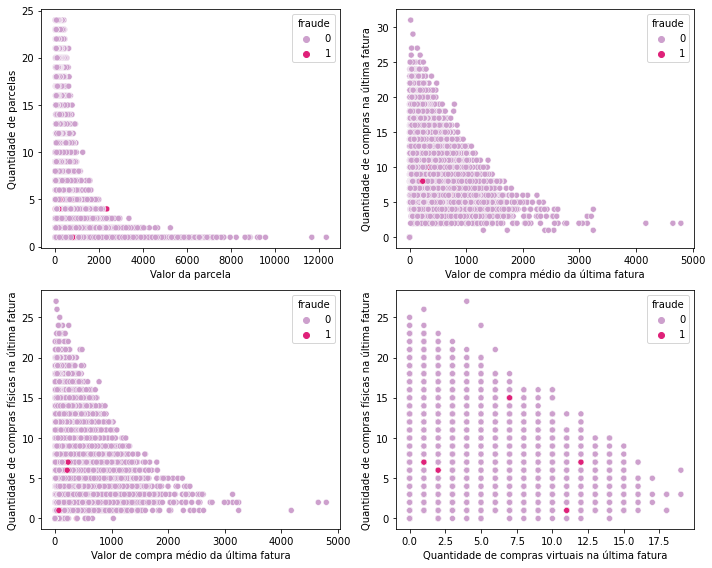

In [46]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)
g = sns.scatterplot(data=data2, x="valor_parcela", y="qnt_parcelas", hue="fraude", palette = "PuRd", ax =ax1)
g.set(xlabel='Valor da parcela', ylabel='Quantidade de parcelas')

ax2 = fig.add_subplot(222)
g = sns.scatterplot(data=data2, x="media_compra_ult_fatura", y="qnt_compra_ult_fatura", hue="fraude", palette = "PuRd", ax = ax2)
g.set(xlabel='Valor de compra médio da última fatura', ylabel='Quantidade de compras na última fatura')

ax3 = fig.add_subplot(223)
g = sns.scatterplot(data=data2, x="media_compra_ult_fatura", y="qnt_compra_fisica_ult_fatura", hue="fraude", palette = "PuRd", ax = ax3)
g.set(xlabel='Valor de compra médio da última fatura', ylabel='Quantidade de compras físicas na última fatura')

ax4 = fig.add_subplot(224)
g = sns.scatterplot(data=data2, x="qnt_compra_virtual_ult_fatura", y="qnt_compra_fisica_ult_fatura", hue="fraude", palette = "PuRd", ax = ax4)
g.set(xlabel='Quantidade de compras virtuais na última fatura', ylabel='Quantidade de compras físicas na última fatura')

plt.close(2)
plt.close(3)
plt.tight_layout()

## Cenário 3

In [10]:
data3 = pd.read_csv('Cenario3_200000.csv')
data3.head()

,sexo,nivel_escolaridade,faixa_etaria,estado_civil,classe_economica_familiar,responsavel_renda_familiar,maior_idade,nome_igual_bureau,nome_mae_igual_bureau,cpf_ativo,score_similaridade_nome,score_similaridade_nome_mae,score_fraude_maior_ponto_corte,foto_semelhante_documento,conta,cartao,fatura_atraso,nome_negativado,fraude
0,Feminino,Ensino superior completo,Adulto (de 20 à 59 anos),Solteiro(a),Classe média,0,1,0,0,1,1,1,0,1,1,1,0,0,0
1,Feminino,Ensino médio completo e superior incompleto,Adulto (de 20 à 59 anos),Casado(a),Classe média,1,1,0,1,1,1,1,0,1,1,1,0,0,0
2,Masculino,Ensino fundamental completo e médio incompleto,Adulto (de 20 à 59 anos),Casado(a),Classe baixa,0,1,1,1,1,1,1,0,1,1,1,0,0,0
3,Feminino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Viúvo(a),Classe baixa,1,1,1,0,1,1,1,1,1,1,1,0,0,0
4,Masculino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Casado(a),Classe baixa,1,1,0,1,1,1,1,0,1,1,1,1,1,0


In [11]:
data3 = data3.astype('object')
data3['fraude'] = data3['fraude'].astype('category')

In [12]:
data3.dtypes

sexo                                object
nivel_escolaridade                  object
faixa_etaria                        object
estado_civil                        object
classe_economica_familiar           object
responsavel_renda_familiar          object
maior_idade                         object
nome_igual_bureau                   object
nome_mae_igual_bureau               object
cpf_ativo                           object
score_similaridade_nome             object
score_similaridade_nome_mae         object
score_fraude_maior_ponto_corte      object
foto_semelhante_documento           object
conta                               object
cartao                              object
fatura_atraso                       object
nome_negativado                     object
fraude                            category
dtype: object

In [51]:
#frequencia das variáveis 
a = data3.groupby(["nome_negativado"]).nome_negativado.count()
(a/len(data3))*100

nome_negativado
0    88.4125
1    11.5875
Name: nome_negativado, dtype: float64

In [50]:
#frequencia das variáveis 
a = data3.loc[data3.fraude == 1].groupby(["nome_negativado"]).nome_negativado.count()
(a/len(data3.loc[data3.fraude == 1]))*100

nome_negativado
0    87.606838
1    12.393162
Name: nome_negativado, dtype: float64

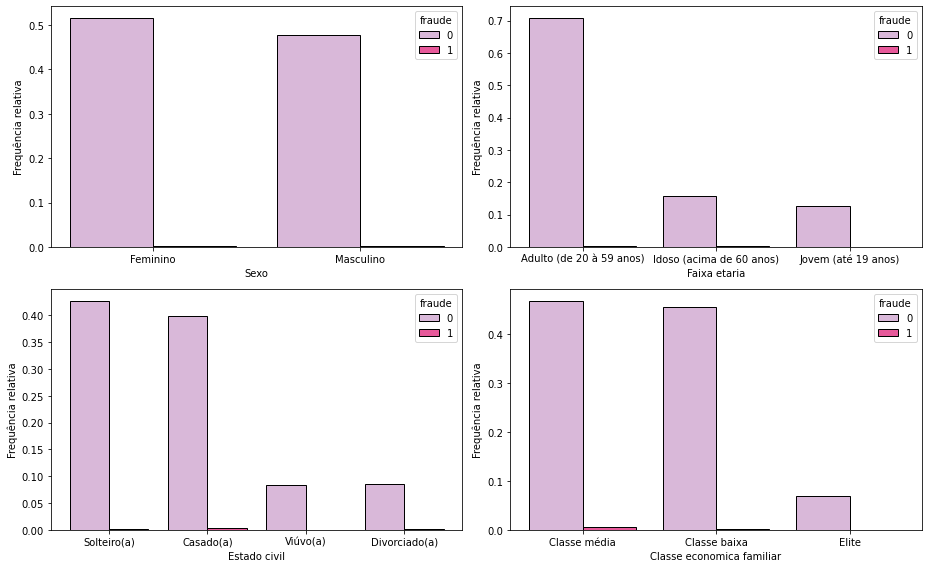

In [67]:
fig = plt.figure(figsize=(13,8))

ax1 = fig.add_subplot(221)
g =sns.histplot(data3, x="sexo", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax1)
g.set(xlabel='Sexo', ylabel='Frequência relativa')

ax3 = fig.add_subplot(222)
g = sns.histplot(data3, x="faixa_etaria", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax3)
g.set(xlabel='Faixa etaria', ylabel='Frequência relativa')

ax4 = fig.add_subplot(223)
g =sns.histplot(data3, x="estado_civil", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax4)
g.set(xlabel='Estado civil', ylabel='Frequência relativa')

ax5 = fig.add_subplot(224)
g = sns.histplot(data3, x="classe_economica_familiar", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax5)
g.set(xlabel='Classe economica familiar', ylabel='Frequência relativa')

plt.close(2)
plt.close(3)
plt.tight_layout()

[Text(0.5, 0, 'Nivel de escolaridade'), Text(0, 0.5, 'Frequência relativa')]

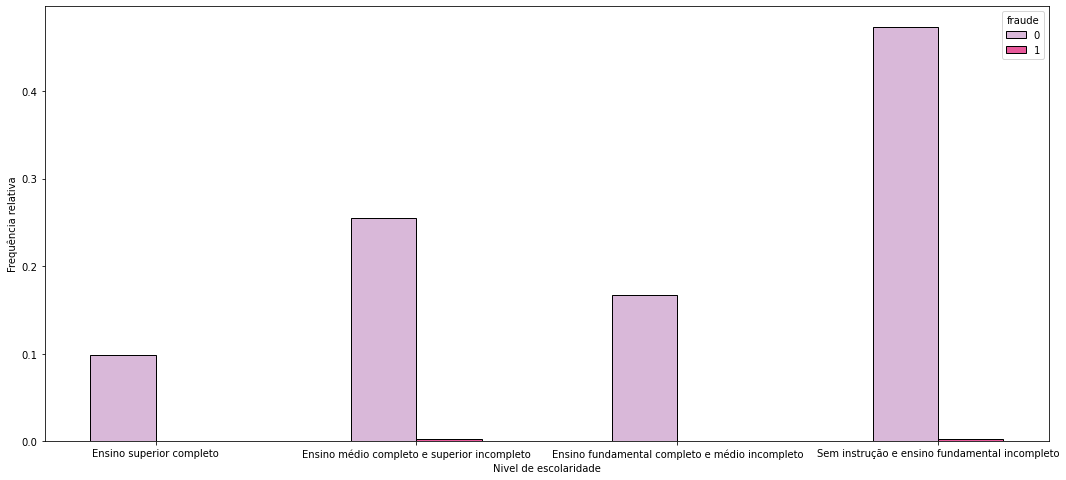

In [127]:
fig = plt.figure(figsize=(18,8))
g = sns.histplot(data3, x="nivel_escolaridade", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.5)
g.set(xlabel='Nivel de escolaridade', ylabel='Frequência relativa')

In [142]:
var = ["responsavel_renda_familiar", 'maior_idade', 'nome_igual_bureau', 'nome_mae_igual_bureau','score_similaridade_nome',
       "score_similaridade_nome_mae", "score_fraude_maior_ponto_corte","foto_semelhante_documento",
       "conta", "cartao","fatura_atraso", "nome_negativado","cpf_ativo"]
for i in var:
    data3[i] = np.where(data3[i] == 1, "Sim", 'Não')

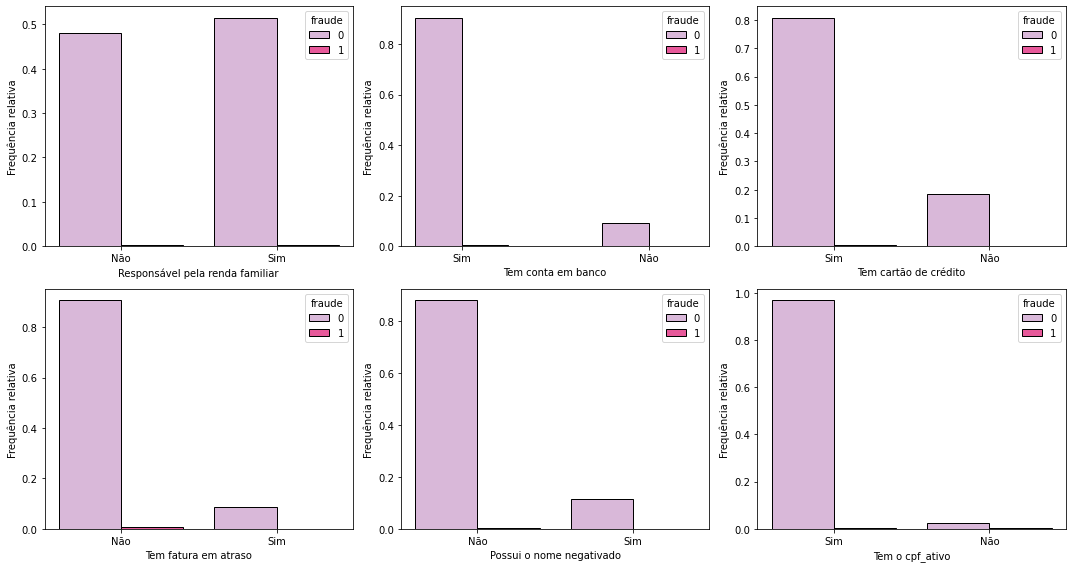

In [136]:
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(231)
g =sns.histplot(data3, x="responsavel_renda_familiar", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax1)
g.set(xlabel='Responsável pela renda familiar', ylabel='Frequência relativa')

ax2 = fig.add_subplot(232)
g = sns.histplot(data3, x="conta", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.5, ax=ax2)
g.set(xlabel='Tem conta em banco', ylabel='Frequência relativa')

ax3 = fig.add_subplot(233)
g =sns.histplot(data3, x="cartao", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax3)
g.set(xlabel='Tem cartão de crédito', ylabel='Frequência relativa')

ax4 = fig.add_subplot(234)
g = sns.histplot(data3, x="fatura_atraso", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax4)
g.set(xlabel='Tem fatura em atraso', ylabel='Frequência relativa')

ax5 = fig.add_subplot(235)
g = sns.histplot(data3, x="nome_negativado", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax5)
g.set(xlabel='Possui o nome negativado', ylabel='Frequência relativa')

ax6 = fig.add_subplot(236)
g =sns.histplot(data3, x="cpf_ativo", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax6)
g.set(xlabel='Tem o cpf_ativo', ylabel='Frequência relativa')

plt.close(2)
plt.close(3)
plt.tight_layout()

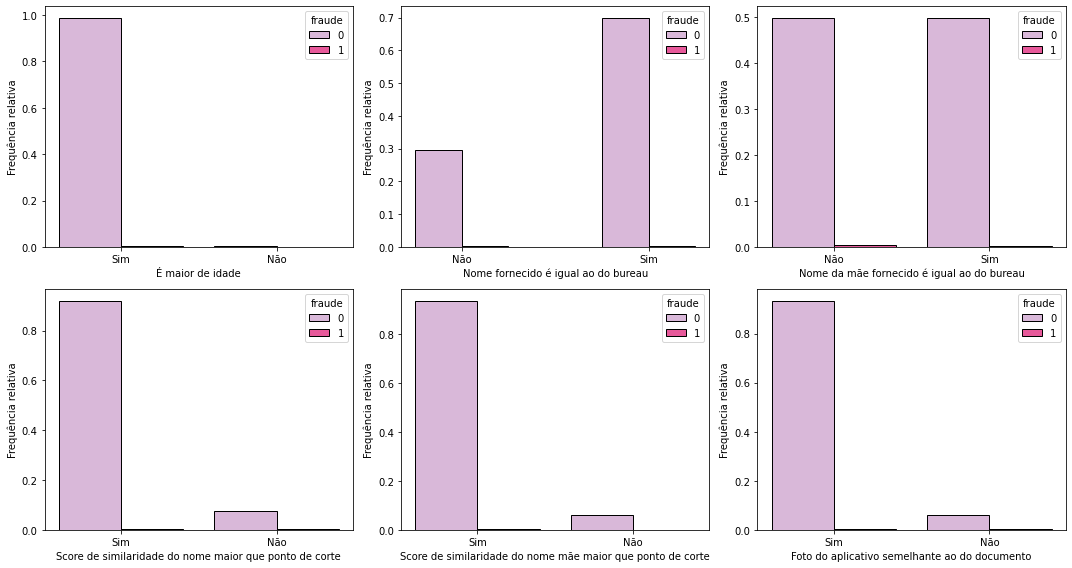

In [137]:
fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(231)
g =sns.histplot(data3, x="maior_idade", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax1)
g.set(xlabel='É maior de idade', ylabel='Frequência relativa')

ax2 = fig.add_subplot(232)
g = sns.histplot(data3, x="nome_igual_bureau", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.5, ax=ax2)
g.set(xlabel='Nome fornecido é igual ao do bureau', ylabel='Frequência relativa')

ax3 = fig.add_subplot(233)
g =sns.histplot(data3, x="nome_mae_igual_bureau", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax3)
g.set(xlabel='Nome da mãe fornecido é igual ao do bureau', ylabel='Frequência relativa')

ax4 = fig.add_subplot(234)
g = sns.histplot(data3, x="score_similaridade_nome", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax4)
g.set(xlabel='Score de similaridade do nome maior que ponto de corte', ylabel='Frequência relativa')

ax5 = fig.add_subplot(235)
g = sns.histplot(data3, x="score_similaridade_nome_mae", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax5)
g.set(xlabel='Score de similaridade do nome mãe maior que ponto de corte', ylabel='Frequência relativa')

ax6 = fig.add_subplot(236)
g =sns.histplot(data3, x="foto_semelhante_documento", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8, ax=ax6)
g.set(xlabel='Foto do aplicativo semelhante ao do documento', ylabel='Frequência relativa')

plt.close(2)
plt.close(3)
plt.tight_layout()

[Text(0.5, 0, 'Score de fraude maior que ponto de corte'),
 Text(0, 0.5, 'Frequência relativa')]

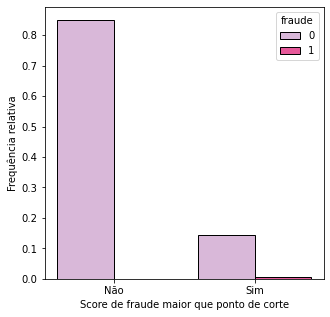

In [143]:
fig = plt.figure(figsize=(5,5))
g = sns.histplot(data3, x="score_fraude_maior_ponto_corte", hue="fraude", stat="probability", multiple="dodge",palette = "PuRd", shrink=.8)
g.set(xlabel='Score de fraude maior que ponto de corte', ylabel='Frequência relativa')